<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-interactions-from-PDB-RNA-ligands-dataset" data-toc-modified-id="Analysis-of-interactions-from-PDB-RNA-ligands-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of interactions from PDB RNA-ligands dataset</a></span><ul class="toc-item"><li><span><a href="#Resolution-data" data-toc-modified-id="Resolution-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resolution data</a></span><ul class="toc-item"><li><span><a href="#some-stats" data-toc-modified-id="some-stats-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>some stats</a></span></li></ul></li><li><span><a href="#Interaction-data" data-toc-modified-id="Interaction-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Interaction data</a></span><ul class="toc-item"><li><span><a href="#Remove-non-standard-residues" data-toc-modified-id="Remove-non-standard-residues-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Remove non standard residues</a></span></li><li><span><a href="#plot-annotation-defs" data-toc-modified-id="plot-annotation-defs-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>plot annotation defs</a></span></li><li><span><a href="#Subsets-of-a-given-resolution" data-toc-modified-id="Subsets-of-a-given-resolution-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Subsets of a given resolution</a></span></li><li><span><a href="#One-combined-plot-for-some-resolutions" data-toc-modified-id="One-combined-plot-for-some-resolutions-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>One combined plot for some resolutions</a></span></li></ul></li></ul></li></ul></div>

# Analysis of interactions from PDB RNA-ligands dataset

In [1]:
# python prerequisities

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
%config Completer.use_jedi = False

sns.set(font_scale=2, style="ticks", rc={"axes.titlesize":24,"axes.labelsize":20, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

In [2]:
def show_values_on_bars(axs, h_v="v", space=92, ycorrection=-0.2):
    # https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    def _show_on_single_plot(ax):
        if h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() + ycorrection
                value = p.get_width()
#                 print ("value:", value, type(value), np.isnan(value))
                if np.isnan(value):
                    value = 0
                    _x = 0 + float(space)
                if value >= 0:
                    valueInt = int(value)
                    ax.text(_x,
                            _y,
                            str(valueInt),
                            ha="left",
                            color="black", backgroundcolor="white",
                            alpha=0.99)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Resolution data

In [3]:
resolutions = pd.read_csv("data/PDBs_method_resolution.tsv",
                       delimiter="\t")

resolutions

,pdb,Method,Resolution
0,1AJU,Solution NMR,NaN
1,1EI2,Solution NMR,NaN
2,1FUF,X-ray diffraction,1.700
3,1I9V,X-ray diffraction,2.600
4,1JZY,X-ray diffraction,3.500
...,...,...,...
202,3SKZ,X-ray diffraction,2.605
203,3TD1,X-ray diffraction,2.100
204,4P20,X-ray diffraction,2.700
205,4V5C,X-ray diffraction,3.300


###  some stats

In [4]:
resolutions.groupby(['Method']).count()['pdb']

Method
Solution NMR          27
X-ray diffraction    180
Name: pdb, dtype: int64

In [5]:
print (min(resolutions.dropna(axis=0).Resolution))
print (max(resolutions.dropna(axis=0).Resolution))

0.61
4.5


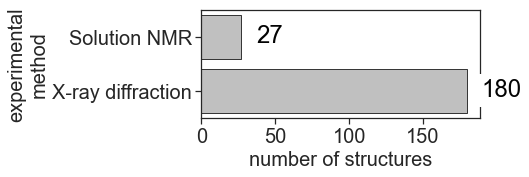

In [6]:
fig, ax = plt.subplots(figsize=(5, 2))
ax = sns.countplot(
    y="Method",
    data=resolutions,
    color='silver',
    edgecolor="black",
    linewidth=0.75,
)

ax.set_xlabel('number of structures')
ax.set_ylabel('experimental\nmethod')

show_values_on_bars(ax, h_v="h", space=10, ycorrection=-0.3)

Text(0.5, 0, 'resolution [Å]')

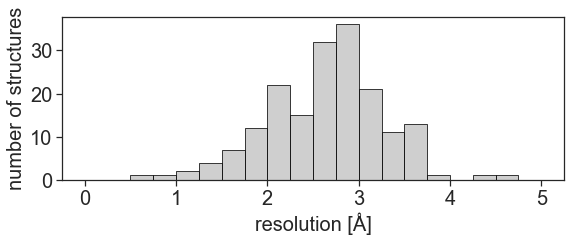

In [7]:
fig, ax = plt.subplots(figsize=(9, 3))

ax = sns.histplot(
    data=resolutions,
    x="Resolution",
    color='silver',
    edgecolor="black",
    linewidth=0.75,
    binwidth=0.25,
    binrange=(0, 5)
)

# ax.set_title('subplot 1')
ax.set_ylabel('number of structures')
ax.set_xlabel('resolution [Å]')

In [8]:
resolutionValues = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

resCumulStats = pd.DataFrame({})
resCumulStats = pd.DataFrame(columns = ['resolution', 'count'])

resolutionSubsets = {} 

for resolutionValue in resolutionValues:
    ile = len(resolutions[resolutions.Resolution <= resolutionValue])
    
    resolutionSubsets[resolutionValue] = resolutions[resolutions.Resolution <= resolutionValue]
    
    proc = 100*ile/207
    print("<=%sÅ: %s structures (%.2f%% of all)" % (resolutionValue, ile, proc))
    resCumulStats.loc[len(resCumulStats)]=["≤ %sÅ" % resolutionValue, ile] 
    
# display(resCumulStats)

resolutionSubsets["NMR"] = resolutions[resolutions.Method == "Solution NMR"]

# display(resolutionSubsets)

<=1.5Å: 8 structures (3.86% of all)
<=2.0Å: 35 structures (16.91% of all)
<=2.5Å: 73 structures (35.27% of all)
<=3.0Å: 139 structures (67.15% of all)
<=3.5Å: 171 structures (82.61% of all)
<=4.0Å: 178 structures (85.99% of all)


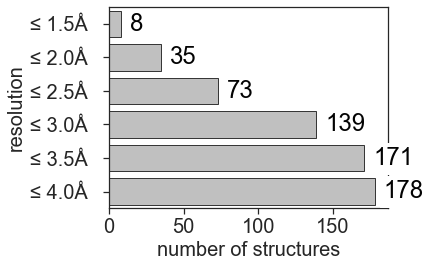

In [9]:
fig, ax = plt.subplots(figsize=(5, 3.7))
ax = sns.barplot(
    y="resolution",
    x="count",
    data=resCumulStats,
    color='silver',
    edgecolor="black",
    linewidth=0.75,
)

ax.set_ylabel('resolution')
ax.set_xlabel('number of structures')

show_values_on_bars(ax, h_v="h", space=6, ycorrection=-0.2)

ax.tick_params(axis='y', which='major', pad=15)

## Interaction data

In [10]:
imgSubDir = "hi-res-images/" # directory for image output

In [11]:
# let's read the detailed interactions data

# generate it with SUMMARY/generate-full-data-file.sh

inputFile = "SIFs_outputs/SUMMARY/DETAILED-all-data.tsv"


fulldata = pd.read_csv(inputFile,
                       delimiter="\t",
                      index_col=0)  # header=None


## if we want to deduplicate the data
## eg., for Hydrogen bonds - if for the same interacting points we have the same type of interaction,
## fulldata.drop_duplicates(inplace=True)

fulldata.head(5)

,Ligand_name,Ligand_pose,Ligand_occurrence_in_sdf,Interaction,Ligand_Atom,Ligand_X,Ligand_Y,Ligand_Z,Receptor_Residue_Name,Receptor_Number,Receptor_Chain,Receptor_Atom,Receptor_X,Receptor_Y,Receptor_Z,Distance,PDB,LigandNumber
0,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
1,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
2,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
3,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
4,1AJU,1,1,HB,8,-4.054,-2.296,-1.685,A,22,A,N7,-4.333,0.639,-0.874,3.05774,1AJU,1


In [12]:
# for the initial dataset. All interactions counted, including those formed multiple time to the given residue
fulldata.groupby('Interaction')['Ligand_name'].count()

Interaction
CA                 904
HAL                  6
HB                5063
Ion-mediated       214
Lipophilic        3609
Pi_Anion            28
Pi_Cation           97
Pi_Stacking        146
Water-mediated     302
Name: Ligand_name, dtype: int64

### Remove non standard residues

In [13]:
# distanceData.groupby(['Receptor_Residue_Name']).count()['Ligand_name'].index
# ['1MA', '5BU', '5MU', '7MG', 'A', 'C', 'DA', 'DC', 'G', 'HOH', 'K', 'MG',
#        'MN', 'OMG', 'OMU', 'PB', 'PSU', 'SR', 'U', 'UR3'],

nonStandard = ['1MA', '5BU', '5MU', '7MG', 'DA', 'DC', 'OMG', 'OMU', 'PSU', 'SR', 'UR3']

# remove those defined as non standard
fulldata2 = fulldata[~fulldata['Receptor_Residue_Name'].isin(nonStandard)]

fulldata2

,Ligand_name,Ligand_pose,Ligand_occurrence_in_sdf,Interaction,Ligand_Atom,Ligand_X,Ligand_Y,Ligand_Z,Receptor_Residue_Name,Receptor_Number,Receptor_Chain,Receptor_Atom,Receptor_X,Receptor_Y,Receptor_Z,Distance,PDB,LigandNumber
0,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
1,1AJU,1,1,HB,11,-5.391,-3.809,-2.701,A,22,A,O3',-8.560,-3.085,-3.339,3.31267,1AJU,1
2,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
3,1AJU,1,1,HB,10,-4.208,-2.324,-3.942,A,22,A,N3,-4.500,0.834,-4.453,3.21237,1AJU,1
4,1AJU,1,1,HB,8,-4.054,-2.296,-1.685,A,22,A,N7,-4.333,0.639,-0.874,3.05774,1AJU,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,4V8F,1,1,HB,4,3.951,210.818,13.180,U,1495,B,O4,3.359,213.771,12.488,3.09023,4V8F,1
57,4V8F,1,1,HB,4,3.951,210.818,13.180,U,1495,B,O4,3.359,213.771,12.488,3.09023,4V8F,1
58,4V8F,1,1,HB,4,3.951,210.818,13.180,C,1496,B,N4,3.733,211.846,9.460,3.86558,4V8F,1
59,4V8F,1,1,HB,4,3.951,210.818,13.180,C,1496,B,N4,3.733,211.846,9.460,3.86558,4V8F,1


In [14]:
# keep only data we need

distanceData = fulldata2[['PDB', 'Ligand_name', 'Interaction', 'Distance', 'Receptor_Atom', 'Receptor_Residue_Name']]

distanceData.head(5)

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name
0,1AJU,1AJU,HB,3.31267,O3',A
1,1AJU,1AJU,HB,3.31267,O3',A
2,1AJU,1AJU,HB,3.21237,N3,A
3,1AJU,1AJU,HB,3.21237,N3,A
4,1AJU,1AJU,HB,3.05774,N7,A


In [15]:
# dictionary of a human-friendly names of interactions

interactionDesc = {}
interactionDesc['Pi_Stacking'] = "Pi-stacking"
interactionDesc['Pi_Cation'] = "Pi-cation"
interactionDesc['HB'] = "Hydrogen bond"
interactionDesc['CA'] = "Cation-anion"
interactionDesc['Pi_Anion'] = "Pi-anion"
interactionDesc['HAL'] = "Halogen bond"
interactionDesc['Lipophilic'] = "Lipophilic"
interactionDesc['Water-mediated'] = "Water-mediated"
interactionDesc['Ion-mediated'] = "Ion-mediated"
# interactionDesc[''] = ""
# interactionDesc[''] = ""


# dictionary of a human friendly name of ions and other

ionsDict = {}

ionsDict['K'] = 'K ion'
ionsDict['MG'] = 'Mg ion'
# ionsDict['MN'] = ''
# ionsDict['PB'] = ''
# ionsDict['SR'] = ''

In [16]:
distanceData.groupby(['Receptor_Residue_Name']).count()

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom
Receptor_Residue_Name,,,,,
A,2427,2427,2427,2427,2427
C,2052,2052,2052,2052,2052
G,4086,4086,4086,4086,4086
HOH,151,151,151,151,151
K,64,64,64,64,64
MG,36,36,36,36,36
MN,2,2,2,2,2
PB,1,1,1,1,1
U,1476,1476,1476,1476,1476


In [17]:
# friendly names for interactions

distanceData['Interaction'] = distanceData['Interaction'].replace(interactionDesc)

distanceData['Receptor_Residue_Name'] = distanceData['Receptor_Residue_Name'].replace(ionsDict)

distanceData.head(4)

/tmp/ipykernel_195263/865277827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distanceData['Interaction'] = distanceData['Interaction'].replace(interactionDesc)
/tmp/ipykernel_195263/865277827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distanceData['Receptor_Residue_Name'] = distanceData['Receptor_Residue_Name'].replace(ionsDict)


,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name
0,1AJU,1AJU,Hydrogen bond,3.31267,O3',A
1,1AJU,1AJU,Hydrogen bond,3.31267,O3',A
2,1AJU,1AJU,Hydrogen bond,3.21237,N3,A
3,1AJU,1AJU,Hydrogen bond,3.21237,N3,A


In [18]:
# not-so-quick and dirty hack to rename ionic interactions

columns = [
    'PDB', 'Ligand_name', 'Interaction', 'Distance', 'Receptor_Atom', 'Receptor_Residue_Name',
    'Interaction2'
]


distanceData2 = pd.DataFrame(
    data=None,
    columns=columns,
)

for index, row in distanceData.iterrows():  #.itertuples():
    if row['Interaction'] == interactionDesc['Ion-mediated']:
        if len(row['Ligand_name']) >= 4:
            # normal ligand, not HOH or ion
            # Ligand <-> ion
            row['Interaction2'] = interactionDesc['Ion-mediated'] + " (" + row[
            'Receptor_Residue_Name'] + "): ligand-ion"
        else:
            # ion or HOH
            # ion <-> RNA
            row['Interaction2'] = interactionDesc['Ion-mediated'] + " (" + row[
            'Ligand_name'] + " ion): ion-RNA"
                
    elif row['Interaction'] == interactionDesc['Water-mediated']:
        if len(row['Ligand_name']) >= 4:
            # normal ligand, not HOH or ion
            # Ligand <-> hoh
            row['Interaction2'] = interactionDesc['Water-mediated'] + ": ligand-water"
        else:
            # hoh <-> RNA
            row['Interaction2'] = interactionDesc['Water-mediated'] + ": water-RNA"
          

    else:
        row['Interaction2'] = row['Interaction']
            
    distanceData2.loc[len(distanceData2)] = row

distanceData2

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction2
0,1AJU,1AJU,Hydrogen bond,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,Hydrogen bond,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,Hydrogen bond,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,Hydrogen bond,3.21237,N3,A,Hydrogen bond
4,1AJU,1AJU,Hydrogen bond,3.05774,N7,A,Hydrogen bond
...,...,...,...,...,...,...,...
10290,4V8F,4V8F,Hydrogen bond,3.09023,O4,U,Hydrogen bond
10291,4V8F,4V8F,Hydrogen bond,3.09023,O4,U,Hydrogen bond
10292,4V8F,4V8F,Hydrogen bond,3.86558,N4,C,Hydrogen bond
10293,4V8F,4V8F,Hydrogen bond,3.86558,N4,C,Hydrogen bond


In [19]:
distanceData2[distanceData2['Interaction'] == interactionDesc['Ion-mediated']]

,PDB,Ligand_name,Interaction,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction2
482,1F27,1F27,Ion-mediated,2.06075,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
483,1F27,MG,Ion-mediated,1.993,OP2,A,Ion-mediated (MG ion): ion-RNA
751,1HNW,1HNW,Ion-mediated,2.058,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
752,1HNW,MG,Ion-mediated,2.9371,O5',C,Ion-mediated (MG ion): ion-RNA
753,1HNW,1HNW,Ion-mediated,2.058,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
...,...,...,...,...,...,...,...
8875,3SKR,MG,Ion-mediated,3.0773,OP2,A,Ion-mediated (MG ion): ion-RNA
10098,4V8A,4V8A,Ion-mediated,1.5777,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion
10099,4V8A,MG,Ion-mediated,2.8916,O3',A,Ion-mediated (MG ion): ion-RNA
10119,4V8A,4V8A,Ion-mediated,1.5777,MG,Mg ion,Ion-mediated (Mg ion): ligand-ion


In [20]:
# remove unnecesary columns and rename it again
distanceData3 = distanceData2.drop(['Interaction'], axis=1).rename(columns={'Interaction2': 'Interaction'})

distanceData3

,PDB,Ligand_name,Distance,Receptor_Atom,Receptor_Residue_Name,Interaction
0,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
1,1AJU,1AJU,3.31267,O3',A,Hydrogen bond
2,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
3,1AJU,1AJU,3.21237,N3,A,Hydrogen bond
4,1AJU,1AJU,3.05774,N7,A,Hydrogen bond
...,...,...,...,...,...,...
10290,4V8F,4V8F,3.09023,O4,U,Hydrogen bond
10291,4V8F,4V8F,3.09023,O4,U,Hydrogen bond
10292,4V8F,4V8F,3.86558,N4,C,Hydrogen bond
10293,4V8F,4V8F,3.86558,N4,C,Hydrogen bond


### plot annotation defs

In [21]:
def show_values_on_bars(axs, ycorrection=-0.2, format="%i", valueSuffix="", spaceCorrection=0):
    # https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    def _show_on_single_plot(ax):
        maxWidth = 0
        for p in ax.patches:
            if p.get_width() > maxWidth:
                maxWidth = p.get_width()
        space = maxWidth * (0.0184 + spaceCorrection)
        print("maxWidth", maxWidth, "space", space)
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space) + 3
            _y = p.get_y() + p.get_height() + ycorrection
            value = p.get_width()
            if np.isnan(value):
                value = 0
                _x = 0 + float(space)
            if value >= 0:
                value = format % (value)
                ax.text(_x,
                        _y,
                        str(value) + valueSuffix,
                        ha="left",
                        color="black",
                        backgroundcolor="white",
                        alpha=0.98)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [22]:
allInteractionNames = ['Hydrogen bond', 'Lipophilic', 'Cation-anion', 'Water-mediated',
       'Pi-stacking', 'Pi-cation', 'Ion-mediated (K ion)',
       'Ion-mediated (Mg ion)', 'Pi-anion', 'Halogen bond']

In [23]:
def doPlotsForGroup(distanceData3, suptitle):
    # Let's remove unfrequent residues

    desiredReceptorNames = [
        'A', 'C', 'G', 'U', 'Mg ion', 'K ion', 'Na ion', 'HOH'
    ]

    distanceData4 = distanceData3[distanceData3['Receptor_Residue_Name'].isin(
        desiredReceptorNames)]

    distanceStats = distanceData4.groupby(
        'Interaction')['Distance'].describe().sort_values(by='count',
                                                          ascending=False)

    # ------------------------------------------------------------------------------------------------ #

    distanceStatsCopy = distanceStats.copy()

    distanceStatsCopy.rename(columns={'Ligand_name': 'Structures count'},
                             index={
                                 'Ion-mediated (MG ion): ion-RNA':
                                 'Ion-mediated (Mg ion)',
                                 'Ion-mediated (K ion): ion-RNA':
                                 'Ion-mediated (K ion)',
                                 'Water-mediated: water-RNA': 'Water-mediated'
                             },
                             inplace=True)

    distanceStatsCopy.drop(index=[
        'Ion-mediated (Mg ion): ligand-ion',
        'Ion-mediated (K ion): ligand-ion', 'Water-mediated: ligand-water'
    ],
                           inplace=True,
                           errors='ignore')

    # only top 10
    distanceStatsCopy = distanceStatsCopy# .iloc[:10, :]
    
    distanceStatsCopyResorted = distanceStatsCopy.reindex(allInteractionNames)

    # ------------------------------------------------------------------------------------------------ #


    ## number of structures with the given interaction

    # number of structures with the given interaction

    numberOfStructures = len(distanceData4.groupby(['PDB']))

#     print(numberOfStructures)

    popularityStats = pd.DataFrame(
        distanceData4.groupby(
            ['PDB', 'Interaction']).count()['Ligand_name'].groupby([
                'Interaction'
            ]).count().sort_values(ascending=False))  #.head(13)
    popularityStats[
        'percentage of all structures'] = popularityStats / numberOfStructures * 100

    popularityStats.rename(columns={'Ligand_name': 'Structures count'},
                           index={
                               'Ion-mediated (MG ion): ion-RNA':
                               'Ion-mediated (Mg ion)',
                               'Ion-mediated (K ion): ion-RNA':
                               'Ion-mediated (K ion)',
                               'Water-mediated: water-RNA': 'Water-mediated'
                           },
                           inplace=True)

    popularityStats.drop(index=[
        'Ion-mediated (Mg ion): ligand-ion',
        'Ion-mediated (K ion): ligand-ion', 'Water-mediated: ligand-water'
    ],
                         inplace=True,
                         errors='ignore')

    # popularityStats = popularityStats[popularityStats.index != 'Water-mediated: ligand-water']

    # ------------------------------------------------------------------------------------------------ #

    # reindex popularityStats to have the same index as distanceStatsCopy

    popularityStatsResorted = popularityStats.reindex(allInteractionNames)

    # ------------------------------------------------------------------------------------------------ #

    # subplots(nrows=1, ncols=1,
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 7))

    # ------------------------------------------------------------------------------------------------ #
    
#     display(distanceStatsCopyResorted)
#     display(popularityStatsResorted)
    
    display(pd.merge(distanceStatsCopyResorted, popularityStatsResorted, left_index=True, right_index=True).drop(['unique', 'top','freq'], axis=1))
    
    # ------------------------------------------------------------------------------------------------ #

    sns.barplot(x="count",
                y=distanceStatsCopyResorted.index,
                data=distanceStatsCopyResorted,
                color='silver',
                edgecolor="black",
                linewidth=0.75,
                ax=axes[0])

    sns.barplot(x="percentage of all structures",
                y=popularityStatsResorted.index,
                data=popularityStatsResorted,
                color='silver',
                edgecolor="black",
                linewidth=0.75,
                ax=axes[1])

    # axes[0,0].set_ylabel('type of interaction', fontsize=24)
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')

    axes[0].set_xlabel('total number\nof detected interactions')
    axes[1].set_xlabel(
        'percentage of structures\nwith the interaction present')

    show_values_on_bars(axes[0])
    show_values_on_bars(axes[1], format="%.1f", valueSuffix="%")

    axes[0].set_title('A.',
                      loc="left",
                      weight='bold',
                      fontdict={
                          'verticalalignment': 'bottom',
                          'position': (-0.3, 1)
                      })

    axes[1].set_title('B.',
                      loc="left",
                      weight='bold',
                      fontdict={
                          'verticalalignment': 'bottom',
                          'position': (-0.1, 1)
                      })
    
    fig.suptitle(suptitle, x=0.3)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.52, top=0.8)

    # plt.savefig(imgSubDir + "total_no_of_interactions+protein+padroni.png", dpi=600, bbox_inches="tight")

,count,Structures count,percentage of all structures
Interaction,,,
Hydrogen bond,5026.0,206,99.516908
Lipophilic,3582.0,196,94.685990
Cation-anion,899.0,127,61.352657
Water-mediated,151.0,31,14.975845
Pi-stacking,146.0,62,29.951691
Pi-cation,96.0,66,31.884058
Ion-mediated (K ion),64.0,13,6.280193
Ion-mediated (Mg ion),36.0,16,7.729469
Pi-anion,28.0,22,10.628019


maxWidth 5026.0 space 92.4784
maxWidth 99.51690821256038 space 1.831111111111111


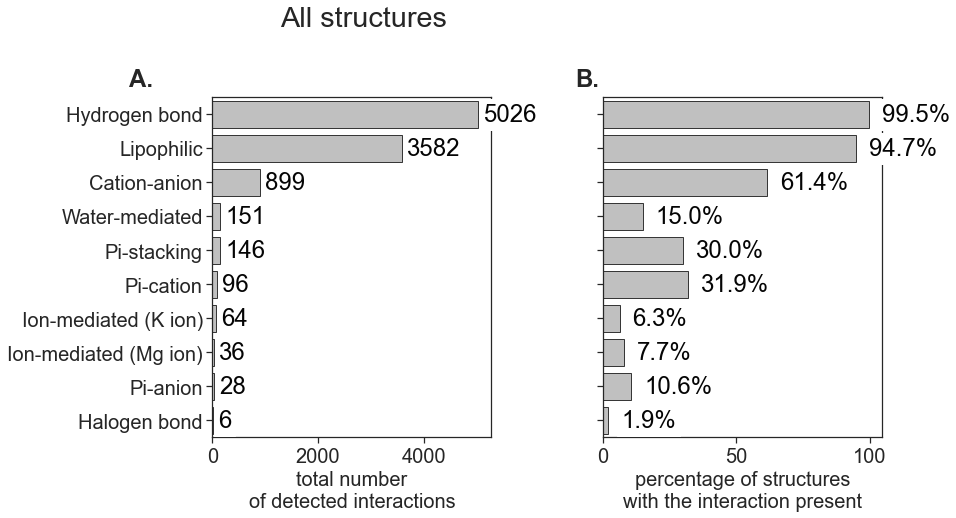

In [24]:
suptitle = "All structures"
doPlotsForGroup(distanceData3, suptitle)


### Subsets of a given resolution

In [25]:
resolutionValues = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
resolutionValues.append('NMR')
resolutionValues

[1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 'NMR']

,count,Structures count,percentage of all structures
Interaction,,,
Hydrogen bond,62.0,8.0,100.0
Lipophilic,42.0,5.0,62.5
Cation-anion,14.0,1.0,12.5
Water-mediated,74.0,7.0,87.5
Pi-stacking,2.0,1.0,12.5
Pi-cation,NaN,NaN,NaN
Ion-mediated (K ion),NaN,NaN,NaN
Ion-mediated (Mg ion),1.0,1.0,12.5
Pi-anion,NaN,NaN,NaN


maxWidth 74.0 space 1.3616
maxWidth 100.0 space 1.8399999999999999


,count,Structures count,percentage of all structures
Interaction,,,
Hydrogen bond,678.0,35.0,100.000000
Lipophilic,302.0,30.0,85.714286
Cation-anion,138.0,15.0,42.857143
Water-mediated,110.0,18.0,51.428571
Pi-stacking,11.0,8.0,22.857143
Pi-cation,10.0,6.0,17.142857
Ion-mediated (K ion),7.0,2.0,5.714286
Ion-mediated (Mg ion),3.0,2.0,5.714286
Pi-anion,8.0,7.0,20.000000


maxWidth 678.0 space 12.4752
maxWidth 100.0 space 1.8399999999999999


,count,Structures count,percentage of all structures
Interaction,,,
Hydrogen bond,1581.0,73,100.000000
Lipophilic,1054.0,67,91.780822
Cation-anion,286.0,36,49.315068
Water-mediated,127.0,23,31.506849
Pi-stacking,53.0,23,31.506849
Pi-cation,29.0,19,26.027397
Ion-mediated (K ion),22.0,6,8.219178
Ion-mediated (Mg ion),10.0,6,8.219178
Pi-anion,15.0,12,16.438356


maxWidth 1581.0 space 29.0904
maxWidth 100.0 space 1.8399999999999999


,count,Structures count,percentage of all structures
Interaction,,,
Hydrogen bond,3273.0,139,100.000000
Lipophilic,2413.0,128,92.086331
Cation-anion,584.0,80,57.553957
Water-mediated,149.0,30,21.582734
Pi-stacking,107.0,45,32.374101
Pi-cation,62.0,42,30.215827
Ion-mediated (K ion),56.0,12,8.633094
Ion-mediated (Mg ion),21.0,11,7.913669
Pi-anion,24.0,19,13.669065


maxWidth 3273.0 space 60.2232
maxWidth 100.0 space 1.8399999999999999


,count,Structures count,percentage of all structures
Interaction,,,
Hydrogen bond,3978.0,171,100.000000
Lipophilic,2852.0,160,93.567251
Cation-anion,764.0,104,60.818713
Water-mediated,151.0,31,18.128655
Pi-stacking,119.0,51,29.824561
Pi-cation,68.0,47,27.485380
Ion-mediated (K ion),64.0,13,7.602339
Ion-mediated (Mg ion),31.0,15,8.771930
Pi-anion,27.0,21,12.280702


maxWidth 3978.0 space 73.1952
maxWidth 100.0 space 1.8399999999999999


,count,Structures count,percentage of all structures
Interaction,,,
Hydrogen bond,4063.0,178,100.000000
Lipophilic,2945.0,167,93.820225
Cation-anion,793.0,107,60.112360
Water-mediated,151.0,31,17.415730
Pi-stacking,123.0,53,29.775281
Pi-cation,74.0,50,28.089888
Ion-mediated (K ion),64.0,13,7.303371
Ion-mediated (Mg ion),31.0,15,8.426966
Pi-anion,27.0,21,11.797753


maxWidth 4063.0 space 74.75919999999999
maxWidth 100.0 space 1.8399999999999999


,count,Structures count,percentage of all structures
Interaction,,,
Hydrogen bond,900.0,26.0,96.296296
Lipophilic,618.0,27.0,100.000000
Cation-anion,94.0,18.0,66.666667
Water-mediated,NaN,NaN,NaN
Pi-stacking,22.0,8.0,29.629630
Pi-cation,22.0,16.0,59.259259
Ion-mediated (K ion),NaN,NaN,NaN
Ion-mediated (Mg ion),NaN,NaN,NaN
Pi-anion,1.0,1.0,3.703704


maxWidth 900.0 space 16.56
maxWidth 100.0 space 1.8399999999999999


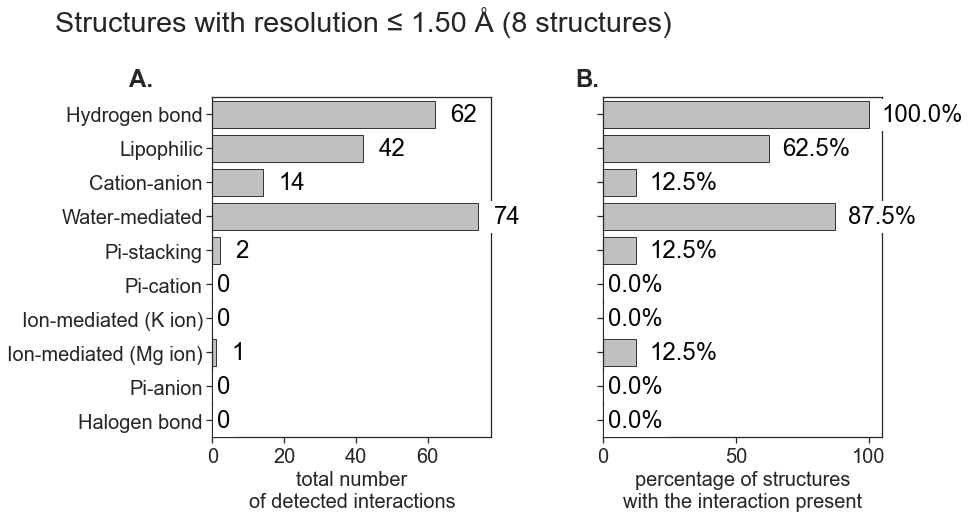

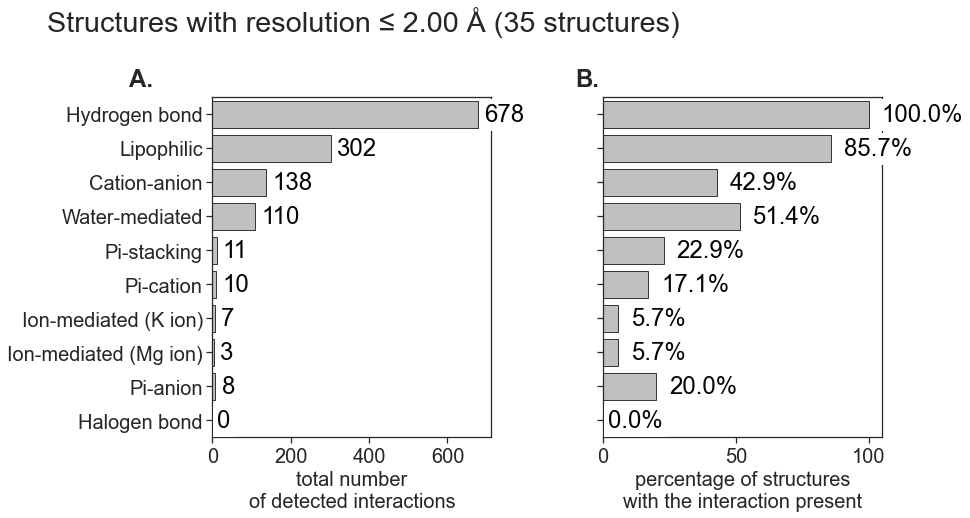

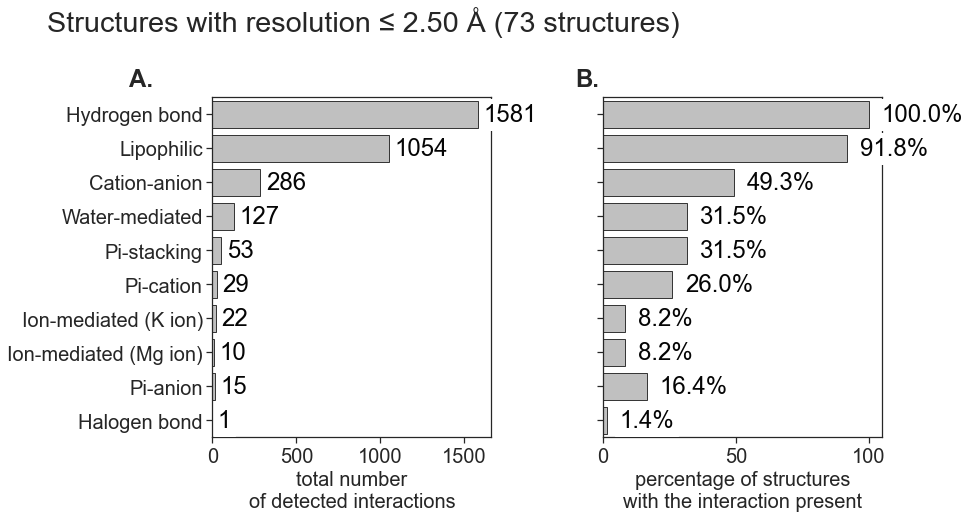

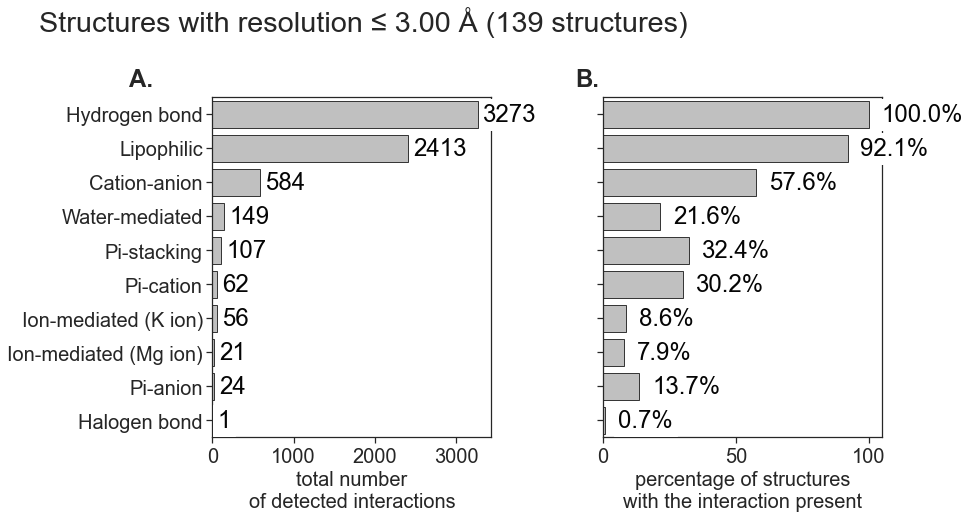

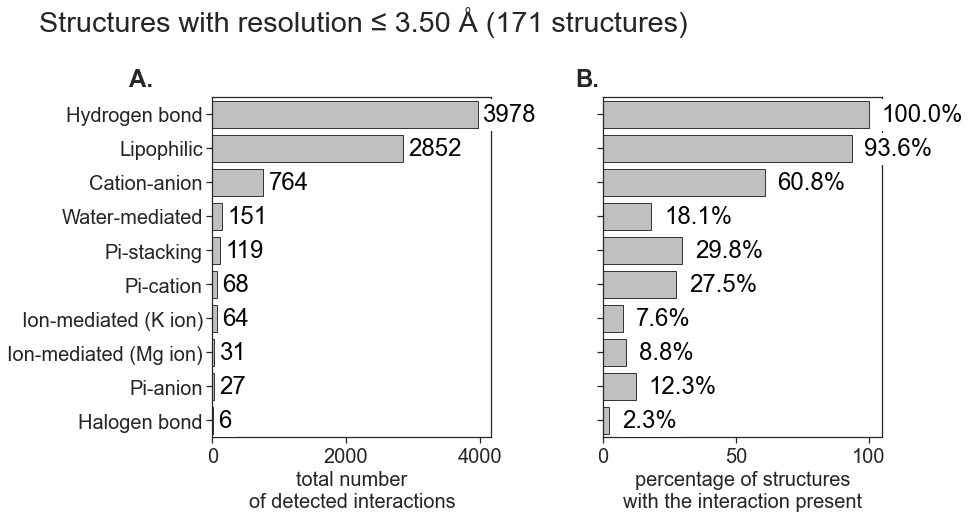

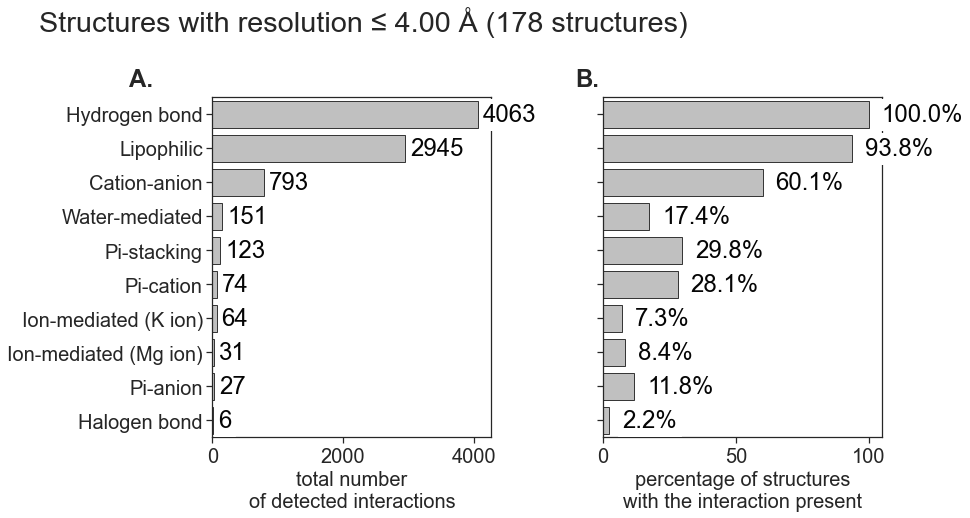

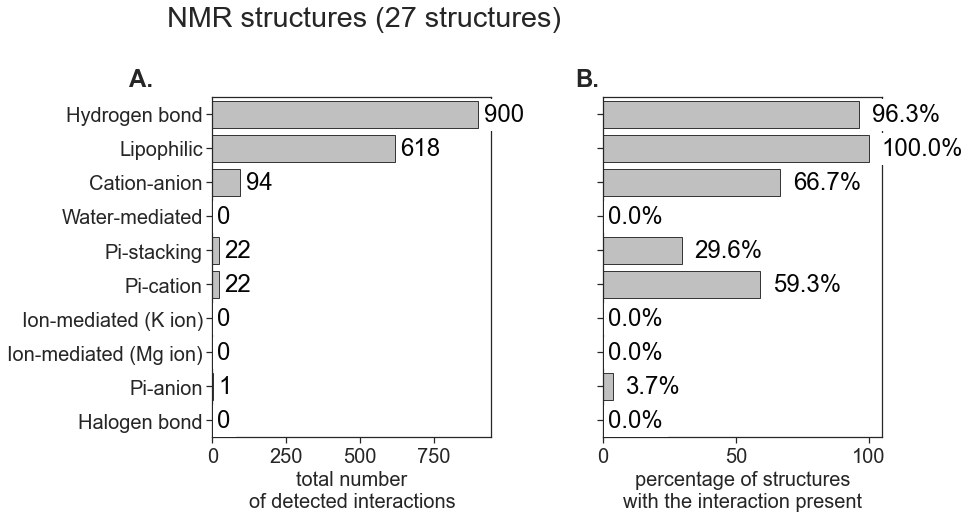

In [26]:
for resolutionValue in resolutionValues:
  
    resolutionSubset = resolutionSubsets[resolutionValue]['pdb'].tolist()
    
    distanceDataResolution = distanceData3[distanceData3.PDB.isin(resolutionSubset)]
    #     display(distanceDataResolution)
    ile = len(distanceDataResolution.groupby('PDB'))

    if resolutionValue != 'NMR':
        suptitle = "Structures with resolution ≤ %.2f Å (%i structures)" % (resolutionValue, ile)
    else:
        suptitle = "NMR structures (%i structures)" % (ile)
    
    doPlotsForGroup(distanceDataResolution, suptitle)



In [27]:
" ".join (resolutionSubsets[1.5]['pdb'].tolist())

'3DW4 2G32 2GQ4 1G4Q 3GLP 4FE5 1F27 1J8G'

### One combined plot for some resolutions

In [28]:
def doPlotsForResolutionGroup(distanceData3, ax, suptitle):
    # Let's remove unfrequent residues

    desiredReceptorNames = [
        'A', 'C', 'G', 'U', 'Mg ion', 'K ion', 'Na ion', 'HOH'
    ]

    distanceData4 = distanceData3[distanceData3['Receptor_Residue_Name'].isin(
        desiredReceptorNames)]

    distanceStats = distanceData4.groupby(
        'Interaction')['Distance'].describe().sort_values(by='count',
                                                          ascending=False)

    # ------------------------------------------------------------------------------------------------ #

    distanceStatsCopy = distanceStats.copy()

    distanceStatsCopy.rename(columns={'Ligand_name': 'Structures count'},
                             index={
                                 'Ion-mediated (MG ion): ion-RNA':
                                 'Ion-mediated (Mg ion)',
                                 'Ion-mediated (K ion): ion-RNA':
                                 'Ion-mediated (K ion)',
                                 'Water-mediated: water-RNA': 'Water-mediated'
                             },
                             inplace=True)

    distanceStatsCopy.drop(index=[
        'Ion-mediated (Mg ion): ligand-ion',
        'Ion-mediated (K ion): ligand-ion', 'Water-mediated: ligand-water'
    ],
                           inplace=True,
                           errors='ignore')

    # only top 10
    distanceStatsCopy = distanceStatsCopy# .iloc[:10, :]
    
    distanceStatsCopyResorted = distanceStatsCopy.reindex(allInteractionNames).iloc[0:5, :]

    # ------------------------------------------------------------------------------------------------ #


    ## number of structures with the given interaction

    # number of structures with the given interaction

    numberOfStructures = len(distanceData4.groupby(['PDB']))

#     print(numberOfStructures)

    popularityStats = pd.DataFrame(
        distanceData4.groupby(
            ['PDB', 'Interaction']).count()['Ligand_name'].groupby([
                'Interaction'
            ]).count().sort_values(ascending=False))  #.head(13)
    popularityStats[
        'percentage of all structures'] = popularityStats / numberOfStructures * 100

    popularityStats.rename(columns={'Ligand_name': 'Structures count'},
                           index={
                               'Ion-mediated (MG ion): ion-RNA':
                               'Ion-mediated (Mg ion)',
                               'Ion-mediated (K ion): ion-RNA':
                               'Ion-mediated (K ion)',
                               'Water-mediated: water-RNA': 'Water-mediated'
                           },
                           inplace=True)

    popularityStats.drop(index=[
        'Ion-mediated (Mg ion): ligand-ion',
        'Ion-mediated (K ion): ligand-ion', 'Water-mediated: ligand-water'
    ],
                         inplace=True,
                         errors='ignore')

    # popularityStats = popularityStats[popularityStats.index != 'Water-mediated: ligand-water']

    # ------------------------------------------------------------------------------------------------ #

    # reindex popularityStats to have the same index as distanceStatsCopy

    popularityStatsResorted = popularityStats.reindex(allInteractionNames)

    # ------------------------------------------------------------------------------------------------ #

    # subplots(nrows=1, ncols=1,

    # ------------------------------------------------------------------------------------------------ #
    
#     display(distanceStatsCopyResorted)
#     display(popularityStatsResorted)
    
#     display(pd.merge(distanceStatsCopyResorted, popularityStatsResorted, left_index=True, right_index=True).drop(['unique', 'top','freq'], axis=1))
    
    # ------------------------------------------------------------------------------------------------ #

    sns.barplot(x="count",
                y=distanceStatsCopyResorted.index,
                data=distanceStatsCopyResorted,
                color='silver',
                edgecolor="black",
                linewidth=0.75,
                ax=ax)



    ax.set_ylabel('')
    ax.set_xlabel('')

    show_values_on_bars(ax, spaceCorrection=0.1)

   
    
    ax.set_title(suptitle, y=1.05)

    # plt.savefig(imgSubDir + "total_no_of_interactions+protein+padroni.png", dpi=600, bbox_inches="tight")

maxWidth 5026.0 space 595.0784
maxWidth 74.0 space 8.7616
maxWidth 678.0 space 80.2752
maxWidth 1581.0 space 187.1904


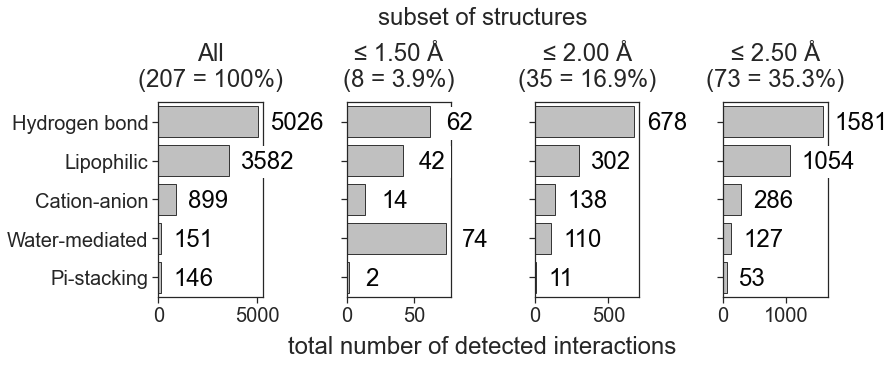

In [33]:
resolutionValues = [1.5, 2.0, 2.5]  # , 'NMR'

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 4))

doPlotsForResolutionGroup(distanceData3, axes[0], "All\n(207 = 100%)")

iax = 0

for resolutionValue in resolutionValues:
    iax += 1

    resolutionSubset = resolutionSubsets[resolutionValue]['pdb'].tolist()

    distanceDataResolution = distanceData3[distanceData3.PDB.isin(
        resolutionSubset)]
    #     display(distanceDataResolution)
    ile = len(distanceDataResolution.groupby('PDB'))
    ileProc = ile/207*100

    if resolutionValue != 'NMR':
        suptitle = "≤ %.2f Å\n(%i = %.1f%%)" % (
            resolutionValue, ile, ileProc)
    else:
        suptitle = "NMR\n(%i = %.1f%%)" % (ile, ileProc)

        
        
    doPlotsForResolutionGroup(distanceDataResolution, axes[iax], suptitle)


fig.text(0.5, 1.07, 'subset of structures', ha='center')
fig.text(0.5, -0.07, 'total number of detected interactions', ha='center')

# fig.suptitle('Bigger 1 row x 2 columns axes with no data')

plt.subplots_adjust(wspace=0.8, hspace=0.52, top=0.8)

plt.savefig("ResolutionStatsSelectedFig.png", dpi=600, bbox_inches="tight")